In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
from lime.lime_tabular import LimeTabularExplainer

d:\xai_framework\XAI-Framework\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load Dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names
class_names = data.target_names

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Train Decision Tree Model
def train_decision_tree(X_train, y_train):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

# Train SVM Model
def train_svm(X_train, y_train):
    model = SVC(probability=True, random_state=42)
    model.fit(X_train, y_train)
    return model

# Train Neural Network Model
def train_neural_network(X_train, y_train):
    model = MLPClassifier(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    return model

In [4]:
# Explain Model Using SHAP
def explain_with_shap(model, X, feature_names):
    # Convert X to a DataFrame to maintain proper feature names
    X_df = pd.DataFrame(X, columns=feature_names)
    explainer = shap.Explainer(model, X_df)
    shap_values = explainer(X_df)
    
    # Ensure that feature_names is a list or array with correct length
    if isinstance(feature_names, list) or isinstance(feature_names, np.ndarray):
        shap.summary_plot(shap_values, X_df, feature_names=feature_names)
    else:
        print("Feature names must be a list or ndarray.")

# Explain Model Using LIME
def explain_with_lime(model, X_train, X_test, feature_names, class_names):
    explainer = LimeTabularExplainer(X_train, feature_names=feature_names, class_names=class_names, discretize_continuous=True)
    explanation = explainer.explain_instance(X_test[0], model.predict_proba, num_features=len(feature_names))
    explanation.show_in_notebook()

In [5]:
# Visualize Feature Importance (Decision Trees Only)
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        sns.barplot(x=importance, y=feature_names)
        plt.title("Feature Importance")
        plt.show()
    else:
        print("Feature importance is not available for this model.")

Decision Tree Accuracy: 1.00
SVM Accuracy: 1.00
Neural Network Accuracy: 1.00

Explaining Decision Tree with SHAP...


TypeError: only integer scalar arrays can be converted to a scalar index

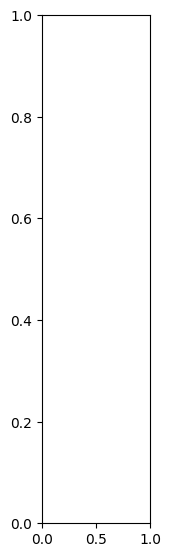

In [6]:
# Main Workflow
if __name__ == "__main__":
    # Train models
    dt_model = train_decision_tree(X_train, y_train)
    svm_model = train_svm(X_train, y_train)
    nn_model = train_neural_network(X_train, y_train)

    # Evaluate models
    for name, model in zip(["Decision Tree", "SVM", "Neural Network"], [dt_model, svm_model, nn_model]):
        y_pred = model.predict(X_test)
        print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")

    # Explain Decision Tree with SHAP
    print("\nExplaining Decision Tree with SHAP...")
    explain_with_shap(dt_model, X, feature_names)

    # Explain SVM with LIME
    print("\nExplaining SVM with LIME...")
    explain_with_lime(svm_model, X_train, X_test, feature_names, class_names)

    # Visualize Feature Importance for Decision Tree
    print("\nVisualizing Feature Importance for Decision Tree...")
    plot_feature_importance(dt_model, feature_names)
